In [9]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

ROOT = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
lit = pd.read_parquet(ROOT / "data/harmonized/benchmarks_lit.parquet")
comp = pd.read_csv(ROOT / "reports/literature_vs_sim.csv")

Columns in lit: ['publication_id', 'assay_method', 'drug_name', 'matrix', 'recovery_pct', 'drug_conc_ug_per_mL', 'figure_ref', 'notes', 'source_file', 'flag']
Saved: /Users/cmontefusco/Coding projects/ada-literature-benchmark/reports/figures/tolerance_ranges.png


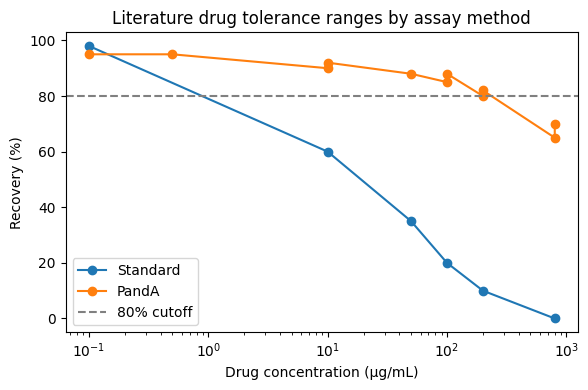

In [17]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

ROOT = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
lit_path = ROOT / "data" / "harmonized" / "benchmarks_lit.parquet"

lit = pd.read_parquet(lit_path)
print("Columns in lit:", list(lit.columns))

# Hard-code the correct column names based on how we built the parquet
conc_col = "drug_conc_ug_per_mL"   # x-axis: drug concentration (µg/mL)
rec_col  = "recovery_pct"          # y-axis: recovery (%)
method_col = "assay_method"        # Standard / PandA

if conc_col not in lit.columns or rec_col not in lit.columns or method_col not in lit.columns:
    raise ValueError(
        f"Expected columns {conc_col}, {rec_col}, {method_col} in lit.\n"
        f"Actual columns: {list(lit.columns)}"
    )

fig, ax = plt.subplots(figsize=(6, 4))

# One curve per assay method (Standard vs PandA)
for method in lit[method_col].unique():
    sub = lit[lit[method_col] == method].sort_values(conc_col)
    ax.plot(
        sub[conc_col],
        sub[rec_col],
        marker="o",
        label=str(method),
    )

# 80% cutoff line
ax.axhline(80, linestyle="--", color="gray", label="80% cutoff")

ax.set_xscale("log")
ax.set_xlabel("Drug concentration (µg/mL)")
ax.set_ylabel("Recovery (%)")
ax.set_title("Literature drug tolerance ranges by assay method")
ax.legend()

out = ROOT / "reports" / "figures" / "tolerance_ranges.png"
out.parent.mkdir(parents=True, exist_ok=True)
fig.tight_layout()
fig.savefig(out, dpi=150)
print("Saved:", out)